In [1]:
import numpy as np
import scipy.stats as sps
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import cor_cluster

In [2]:
dmats = np.load('TSWR_A20_act2_boot.npz')

In [3]:
alias = {'Venomology':'Alchemize', 'Night Terror':'Nightmare', 'Crippling Poison':'Crippling Cloud',
         'Underhanded Strike':'Sneaky Strike', 'Lockon':'Bullseye', 'Steam':'Steam Barrier', 'Steam Power':'Overclock',
         'Redo':'Recursion', 'Undo':'Equilibrium', 'Gash':'Claw', 'ClearTheMind':'Tranquility', 'Wireheading':'Foresight',
         'Vengeance':'Simmering Fury', 'Adaptation':'Rushdown', 'PathToVictory':'Pressure Points', 'Ghostly':'Apparition',
         'Snake Skull':'Snecko Skull', 'GremlinMask':'Gremlin Visage', 'NlothsMask':"N'loth's Hungry Face",
         'Molten Egg 2':'Molten Egg', 'Toxic Egg 2':'Toxic Egg', 'Wraith Form v2':'Wraith Form',
         'Frozen Egg 2':'Frozen Egg', 'CurseOfTheBell':'Curse of the Bell', 'NeowsBlessing':"Neow's Blessing",
         'Fasting2':'Fasting', 'FlurryOfBlows':'Flurry of Blows', 'WaveOfTheHand':'Wave of the Hand',
         'SandsOfTime':'Sands of Time', 'TalkToTheHand':'Talk to the Hand', 'HandOfGreed':'Hand of Greed',
         'NeowsBlessing':"Neow's Lament", 'All For One':'All for One'}

In [4]:
def camel_to_space(s):
    for i in range(1, len(s)):
        if s[i].isupper() and s[i - 1].isalpha() and not s[i - 1].isupper():
            return s[:i] + ' ' + camel_to_space(s[i:])
    return s

In [6]:
cmap = cm.get_cmap('cividis')

Ironclad items

In [7]:
D = dmats['ironclad_boot']
lbls = dmats['ironclad_labels']

for i, name in enumerate(lbls):
    lbls[i] = camel_to_space(alias.get(name, name))

In [8]:
# delete Necronomicurse and Curse of the Bell columns as they are highly correlated with Necronomicon and Calling Bell, resp.c
k = len(lbls)
flat = cor_cluster.flat(k)
del_inds = np.nonzero((lbls == 'Necronomicurse') | (lbls == 'Curse of the Bell'))[0]
inds_flat = [flat[(i, j)] for i in range(k - 1) for j in range(i + 1, k) if i not in del_inds and j not in del_inds]
inds = [i for i in range(k) if i not in del_inds]

lbls = lbls[inds]
D = D[:, inds_flat]

In [9]:
Z = cor_cluster.consensus_cluster(D, lbls)

In [10]:
Z_cut = cor_cluster.split_linkage(Z[:75], lbls)

In [11]:
Z_large = [t for t in Z_cut if len(t[0]) > 1]
Z_small = [t for t in Z_cut if len(t[0]) == 1]

In [12]:
Z_large = cor_cluster.sort_linkages(Z_large, 'mean')
Z_small = cor_cluster.sort_linkages(Z_small, 'mean', desc = True)

In [13]:
np.quantile(D[1:].std(axis = 0), [0, 0.25, .5, 0.75, 1])

array([0.00139926, 0.01941697, 0.02038223, 0.02130444, 0.0666308 ])

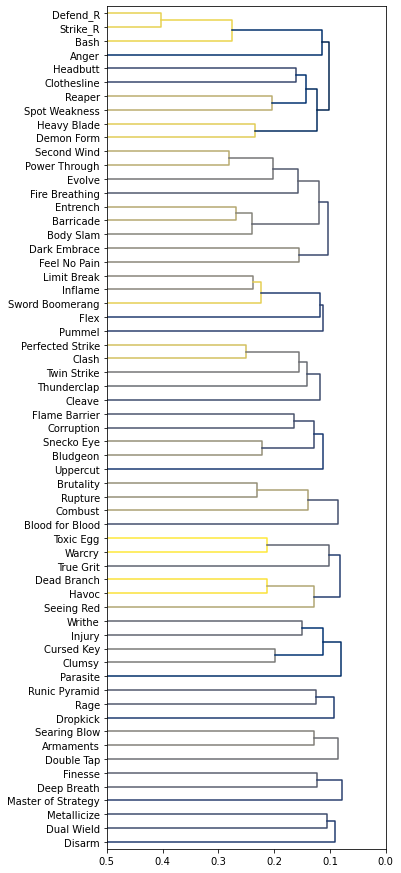

In [14]:
plt.figure(figsize = (5, 15.5))
plt.xlim(0, 0.5)
cor_cluster.dendrogram(Z_large, cmap = cmap, orientation = 'h')

In [15]:
for p, pl in Z_small:
    print('{}---{} ; rho = {} ; p = {}'.format(pl[0], pl[1], p[0, 2], p[0, 4]))

Burning Blood---Neow's Lament ; rho = 0.2713170329412238 ; p = 1.0
Whirlwind---Chemical X ; rho = 0.2595865324441087 ; p = 1.0
Pain---Warped Tongs ; rho = 0.25454783257548663 ; p = 0.986
Bloodletting---Runic Cube ; rho = 0.15324713906055676 ; p = 0.63
Panacea---Chrysalis ; rho = 0.1511489838583181 ; p = 0.606
Berserk---Pandora's Box ; rho = 0.14264104088676244 ; p = 0.598
Apparition---Strange Spoon ; rho = 0.12619148245867406 ; p = 0.67
Pommel Strike---Molten Egg ; rho = 0.12277680002444191 ; p = 0.858
Bronze Scales---Black Star ; rho = 0.1207510080323212 ; p = 0.254
Sentinel---Juggernaut ; rho = 0.11589341934117925 ; p = 0.324
Iron Wave---Ritual Dagger ; rho = 0.11288051204308713 ; p = 0.316
Calling Bell---Pocketwatch ; rho = 0.0987197509088672 ; p = 0.328
Bite---Feed ; rho = 0.0983493987741042 ; p = 0.156
Dark Shackles---Hand of Greed ; rho = 0.0956299479213617 ; p = 0.256
Madness---Thinking Ahead ; rho = 0.08937942992587133 ; p = 0.192
Discovery---Magnetism ; rho = 0.083501442317245

In [16]:
# LaTeX code
for p, pl in Z_small:
    print('{} & {} & {:1.2f} & {:1.2f} \\\\'.format(pl[0], pl[1], p[0, 2], p[0, 4]))

Burning Blood & Neow's Lament & 0.27 & 1.00 \\
Whirlwind & Chemical X & 0.26 & 1.00 \\
Pain & Warped Tongs & 0.25 & 0.99 \\
Bloodletting & Runic Cube & 0.15 & 0.63 \\
Panacea & Chrysalis & 0.15 & 0.61 \\
Berserk & Pandora's Box & 0.14 & 0.60 \\
Apparition & Strange Spoon & 0.13 & 0.67 \\
Pommel Strike & Molten Egg & 0.12 & 0.86 \\
Bronze Scales & Black Star & 0.12 & 0.25 \\
Sentinel & Juggernaut & 0.12 & 0.32 \\
Iron Wave & Ritual Dagger & 0.11 & 0.32 \\
Calling Bell & Pocketwatch & 0.10 & 0.33 \\
Bite & Feed & 0.10 & 0.16 \\
Dark Shackles & Hand of Greed & 0.10 & 0.26 \\
Madness & Thinking Ahead & 0.09 & 0.19 \\
Discovery & Magnetism & 0.08 & 0.27 \\
Shovel & Pantograph & 0.08 & 0.23 \\
Ancient Tea Set & Bag of Marbles & 0.08 & 0.39 \\
Impervious & Boot & 0.08 & 0.42 \\
Sever Soul & Ghostly Armor & 0.08 & 0.19 \\
Red Skull & Pen Nib & 0.08 & 0.31 \\
Reckless Charge & Enchiridion & 0.08 & 0.27 \\
Frozen Eye & Blood Vial & 0.08 & 0.32 \\
Stone Calendar & Peace Pipe & 0.08 & 0.30 \\
Brim

Silent items

In [17]:
D = dmats['silent_boot']
lbls = dmats['silent_labels']
for i, name in enumerate(lbls):
    lbls[i] = camel_to_space(alias.get(name, name))

In [18]:
# delete Necronomicurse and Curse of the Bell columns as they are highly correlated with Necronomicon and Calling Bell, resp.c
k = len(lbls)
flat = cor_cluster.flat(k)
del_inds = np.nonzero((lbls == 'Necronomicurse') | (lbls == 'Curse of the Bell'))[0]
inds_flat = [flat[(i, j)] for i in range(k - 1) for j in range(i + 1, k) if i not in del_inds and j not in del_inds]
inds = [i for i in range(k) if i not in del_inds]

lbls = lbls[inds]
D = D[:, inds_flat]

In [19]:
Z = cor_cluster.consensus_cluster(D, lbls)

In [20]:
Z_cut = cor_cluster.split_linkage(Z[:75], lbls)

In [21]:
Z_large = [t for t in Z_cut if len(t[0]) > 1]
Z_small = [t for t in Z_cut if len(t[0]) == 1]

In [22]:
Z_large = cor_cluster.sort_linkages(Z_large, 'mean')
Z_small = cor_cluster.sort_linkages(Z_small, 'mean', desc = True)

In [23]:
np.quantile(D[1:].std(axis = 0), [0, 0.25, .5, 0.75, 1])

array([0.0017899 , 0.02263676, 0.02403908, 0.02533447, 0.06740321])

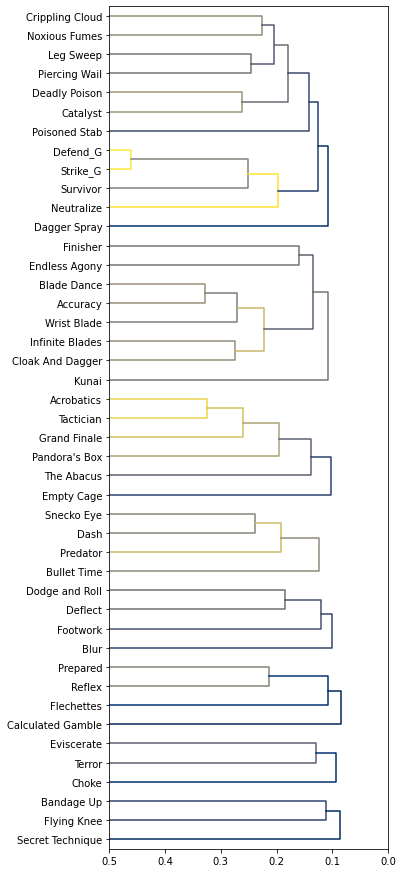

In [24]:
plt.figure(figsize = (5, 15.5))
plt.xlim(0, 0.5)
cor_cluster.dendrogram(Z_large, cmap = cmap, orientation = 'h')

In [25]:
for p, pl in Z_small:
    print('{}---{} ; rho = {} ; p = {}'.format(pl[0], pl[1], p[0, 2], p[0, 4]))

Ring of the Snake---Neow's Lament ; rho = 0.2871746646217267 ; p = 1.0
Clumsy---Cursed Key ; rho = 0.23317291359423042 ; p = 0.97
Concentrate---Runic Pyramid ; rho = 0.19741089872809436 ; p = 0.754
Malaise---Chemical X ; rho = 0.17871694291736295 ; p = 0.852
Phantasmal Killer---Outmaneuver ; rho = 0.15649924839743246 ; p = 0.54
Apotheosis---Fusion Hammer ; rho = 0.15327435873645978 ; p = 0.894
Calling Bell---Omamori ; rho = 0.14569799095401992 ; p = 0.642
Tools of the Trade---Hovering Kite ; rho = 0.14239190215018804 ; p = 0.612
Envenom---Riddle With Holes ; rho = 0.13145040664822127 ; p = 0.48
Apparition---Strange Spoon ; rho = 0.12959799597439703 ; p = 0.668
Backstab---Dead Branch ; rho = 0.12256610568153958 ; p = 0.53
Ninja Scroll---Mutagenic Strength ; rho = 0.11966125700248054 ; p = 0.434
Question Card---Black Star ; rho = 0.112476409057086 ; p = 0.204
Writhe---Du-Vu Doll ; rho = 0.11239500023169602 ; p = 0.168
Sucker Punch---Bouncing Flask ; rho = 0.1104397339788834 ; p = 0.198
D

In [26]:
# LaTeX code
for p, pl in Z_small:
    print('{} & {} & {:1.2f} & {:1.2f} \\\\'.format(pl[0], pl[1], p[0, 2], p[0, 4]))

Ring of the Snake & Neow's Lament & 0.29 & 1.00 \\
Clumsy & Cursed Key & 0.23 & 0.97 \\
Concentrate & Runic Pyramid & 0.20 & 0.75 \\
Malaise & Chemical X & 0.18 & 0.85 \\
Phantasmal Killer & Outmaneuver & 0.16 & 0.54 \\
Apotheosis & Fusion Hammer & 0.15 & 0.89 \\
Calling Bell & Omamori & 0.15 & 0.64 \\
Tools of the Trade & Hovering Kite & 0.14 & 0.61 \\
Envenom & Riddle With Holes & 0.13 & 0.48 \\
Apparition & Strange Spoon & 0.13 & 0.67 \\
Backstab & Dead Branch & 0.12 & 0.53 \\
Ninja Scroll & Mutagenic Strength & 0.12 & 0.43 \\
Question Card & Black Star & 0.11 & 0.20 \\
Writhe & Du-Vu Doll & 0.11 & 0.17 \\
Sucker Punch & Bouncing Flask & 0.11 & 0.20 \\
Distraction & Astrolabe & 0.11 & 0.40 \\
Discovery & Finesse & 0.11 & 0.28 \\
Dark Shackles & Panache & 0.11 & 0.24 \\
Master of Strategy & Gambling Chip & 0.11 & 0.38 \\
Decay & Bottled Flame & 0.10 & 0.20 \\
Deep Breath & Madness & 0.10 & 0.21 \\
Wraith Form & Ectoplasm & 0.10 & 0.16 \\
Eternal Feather & Mummified Hand & 0.10 & 0.38

Defect items

In [27]:
D = dmats['defect_boot']
lbls = dmats['defect_labels']
for i, name in enumerate(lbls):
    lbls[i] = camel_to_space(alias.get(name, name))

In [28]:
# delete Necronomicurse and Curse of the Bell columns as they are highly correlated with Necronomicon and Calling Bell, resp.c
k = len(lbls)
flat = cor_cluster.flat(k)
del_inds = np.nonzero((lbls == 'Necronomicurse') | (lbls == 'Curse of the Bell'))[0]
inds_flat = [flat[(i, j)] for i in range(k - 1) for j in range(i + 1, k) if i not in del_inds and j not in del_inds]
inds = [i for i in range(k) if i not in del_inds]

lbls = lbls[inds]
D = D[:, inds_flat]

In [29]:
Z = cor_cluster.consensus_cluster(D, lbls)

In [30]:
Z_cut = cor_cluster.split_linkage(Z[:75], lbls)

In [31]:
Z_large = [t for t in Z_cut if len(t[0]) > 1]
Z_small = [t for t in Z_cut if len(t[0]) == 1]

In [32]:
Z_large = cor_cluster.sort_linkages(Z_large, 'mean')
Z_small = cor_cluster.sort_linkages(Z_small, 'mean', desc = True)

In [33]:
np.quantile(D[1:].std(axis = 0), [0, 0.25, .5, 0.75, 1])

array([0.00192573, 0.02387496, 0.02518263, 0.02645303, 0.08505178])

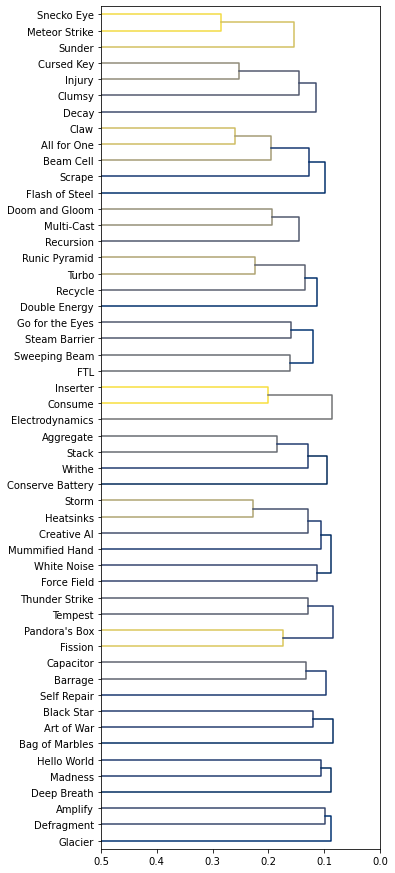

In [34]:
plt.figure(figsize = (5, 15.5))
plt.xlim(0, 0.5)
cor_cluster.dendrogram(Z_large, cmap = cmap, orientation = 'h')

In [35]:
for p, pl in Z_small:
    print('{}---{} ; rho = {} ; p = {}'.format(pl[0], pl[1], p[0, 2], p[0, 4]))

Cracked Core---Neow's Lament ; rho = 0.2611486033127155 ; p = 1.0
Dualcast---Zap ; rho = 0.22243255917741966 ; p = 1.0
Reinforced Body---Chemical X ; rho = 0.18923561742869288 ; p = 0.714
Panache---Bandage Up ; rho = 0.15275963523713976 ; p = 0.468
Chill---Blizzard ; rho = 0.13891342012534236 ; p = 0.554
Sacred Bark---White Beast Statue ; rho = 0.13504673508831688 ; p = 0.65
Ritual Dagger---Darkness ; rho = 0.12405688435893392 ; p = 0.196
Finesse---Purity ; rho = 0.12099842842585662 ; p = 0.256
Apotheosis---Bottled Lightning ; rho = 0.11991077878829048 ; p = 0.418
Parasite---Darkstone Periapt ; rho = 0.11619553007491701 ; p = 0.27
Thinking Ahead---Ectoplasm ; rho = 0.11604380427834593 ; p = 0.284
Hologram---Toxic Egg ; rho = 0.11546940384553961 ; p = 0.318
Rebound---Blind ; rho = 0.11470495630110866 ; p = 0.344
Master of Strategy---Secret Technique ; rho = 0.11231981608594521 ; p = 0.354
Compile Driver---Fusion ; rho = 0.10968366476591429 ; p = 0.21
Leap---Cold Snap ; rho = 0.106758571

In [36]:
# LaTeX code
for p, pl in Z_small:
    print('{} & {} & {:1.2f} & {:1.2f} \\\\'.format(pl[0], pl[1], p[0, 2], p[0, 4]))

Cracked Core & Neow's Lament & 0.26 & 1.00 \\
Dualcast & Zap & 0.22 & 1.00 \\
Reinforced Body & Chemical X & 0.19 & 0.71 \\
Panache & Bandage Up & 0.15 & 0.47 \\
Chill & Blizzard & 0.14 & 0.55 \\
Sacred Bark & White Beast Statue & 0.14 & 0.65 \\
Ritual Dagger & Darkness & 0.12 & 0.20 \\
Finesse & Purity & 0.12 & 0.26 \\
Apotheosis & Bottled Lightning & 0.12 & 0.42 \\
Parasite & Darkstone Periapt & 0.12 & 0.27 \\
Thinking Ahead & Ectoplasm & 0.12 & 0.28 \\
Hologram & Toxic Egg & 0.12 & 0.32 \\
Rebound & Blind & 0.11 & 0.34 \\
Master of Strategy & Secret Technique & 0.11 & 0.35 \\
Compile Driver & Fusion & 0.11 & 0.21 \\
Leap & Cold Snap & 0.11 & 0.19 \\
Panic Button & Velvet Choker & 0.11 & 0.34 \\
Skim & The Abacus & 0.10 & 0.13 \\
Blood Vial & Ceramic Fish & 0.10 & 0.33 \\
Seek & Astrolabe & 0.10 & 0.35 \\
Calling Bell & Omamori & 0.10 & 0.23 \\
Panacea & Biased Cognition & 0.10 & 0.34 \\
Old Coin & Toolbox & 0.10 & 0.20 \\
Bite & Whetstone & 0.10 & 0.26 \\
Loop & Genetic Algorithm & 

Watcher items

In [37]:
D = dmats['watcher_boot']
lbls = dmats['watcher_labels']
for i, name in enumerate(lbls):
    lbls[i] = camel_to_space(alias.get(name, name))

In [38]:
# delete Necronomicurse and Curse of the Bell columns as they are highly correlated with Necronomicon and Calling Bell, resp.c
k = len(lbls)
flat = cor_cluster.flat(k)
del_inds = np.nonzero((lbls == 'Necronomicurse') | (lbls == 'Curse of the Bell'))[0]
inds_flat = [flat[(i, j)] for i in range(k - 1) for j in range(i + 1, k) if i not in del_inds and j not in del_inds]
inds = [i for i in range(k) if i not in del_inds]

lbls = lbls[inds]
D = D[:, inds_flat]

In [39]:
Z = cor_cluster.consensus_cluster(D, lbls)

In [40]:
Z_cut = cor_cluster.split_linkage(Z[:75], lbls)

In [41]:
Z_large = [t for t in Z_cut if len(t[0]) > 1]
Z_small = [t for t in Z_cut if len(t[0]) == 1]

In [42]:
Z_large = cor_cluster.sort_linkages(Z_large, 'mean')
Z_small = cor_cluster.sort_linkages(Z_small, 'mean', desc = True)

In [43]:
np.quantile(D[1:].std(axis = 0), [0, 0.25, .5, 0.75, 1])

array([0.0016218 , 0.02019712, 0.02117518, 0.02215104, 0.07093604])

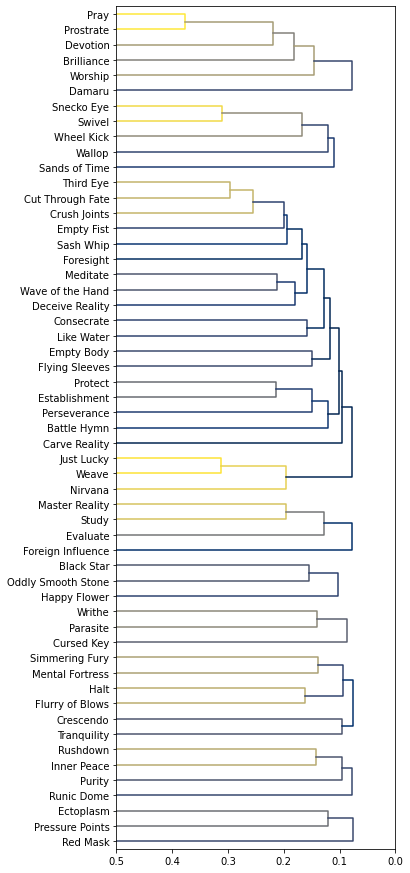

In [44]:
plt.figure(figsize = (5, 15.5))
plt.xlim(0, 0.5)
cor_cluster.dendrogram(Z_large, cmap = cmap, orientation = 'h')

In [45]:
for p, pl in Z_small:
    print('{}---{} ; rho = {} ; p = {}'.format(pl[0], pl[1], p[0, 2], p[0, 4]))

Pure Water---Neow's Lament ; rho = 0.385001166956461 ; p = 1.0
Fasting---Deva Form ; rho = 0.2001048758239834 ; p = 0.98
Collect---Chemical X ; rho = 0.18243885854651265 ; p = 0.9
Vigilance---Eruption ; rho = 0.16177847671715428 ; p = 0.97
Lesson Learned---Fusion Hammer ; rho = 0.14887480393226504 ; p = 0.992
Wreath Of Flame---Ragnarok ; rho = 0.1279835057738341 ; p = 0.376
Flash of Steel---Violence ; rho = 0.12294782426645545 ; p = 0.368
Deep Breath---Master of Strategy ; rho = 0.12094029628851288 ; p = 0.372
Tantrum---Fear No Evil ; rho = 0.10910519290398535 ; p = 0.638
Cauldron---Potion Belt ; rho = 0.10745681404786478 ; p = 0.574
Dark Shackles---Panic Button ; rho = 0.10347947798749102 ; p = 0.296
Frozen Eye---Slavers Collar ; rho = 0.09731750914394155 ; p = 0.48
The Abacus---Omamori ; rho = 0.09458852856522759 ; p = 0.432
Shovel---Pantograph ; rho = 0.09393828396535897 ; p = 0.314
Hand of Greed---Clockwork Souvenir ; rho = 0.09217373184539979 ; p = 0.352
Anchor---Hand Drill ; rho 

In [46]:
# LaTeX code
for p, pl in Z_small:
    print('{} & {} & {:1.2f} & {:1.2f} \\\\'.format(pl[0], pl[1], p[0, 2], p[0, 4]))

Pure Water & Neow's Lament & 0.39 & 1.00 \\
Fasting & Deva Form & 0.20 & 0.98 \\
Collect & Chemical X & 0.18 & 0.90 \\
Vigilance & Eruption & 0.16 & 0.97 \\
Lesson Learned & Fusion Hammer & 0.15 & 0.99 \\
Wreath Of Flame & Ragnarok & 0.13 & 0.38 \\
Flash of Steel & Violence & 0.12 & 0.37 \\
Deep Breath & Master of Strategy & 0.12 & 0.37 \\
Tantrum & Fear No Evil & 0.11 & 0.64 \\
Cauldron & Potion Belt & 0.11 & 0.57 \\
Dark Shackles & Panic Button & 0.10 & 0.30 \\
Frozen Eye & Slavers Collar & 0.10 & 0.48 \\
The Abacus & Omamori & 0.09 & 0.43 \\
Shovel & Pantograph & 0.09 & 0.31 \\
Hand of Greed & Clockwork Souvenir & 0.09 & 0.35 \\
Anchor & Hand Drill & 0.09 & 0.24 \\
Bag of Marbles & Strawberry & 0.09 & 0.39 \\
Scrawl & Pandora's Box & 0.09 & 0.18 \\
Frozen Egg & Akabeko & 0.09 & 0.31 \\
Omniscience & Orrery & 0.08 & 0.29 \\
Spirit Shield & Warped Tongs & 0.08 & 0.20 \\
Wish & Toolbox & 0.08 & 0.17 \\
Signature Move & Judgement & 0.08 & 0.21 \\
Tiny Chest & Gremlin Horn & 0.08 & 0.32 